# Feature Importance

## Introduction
When we fit a supervised machine learning (ML) model, we often want to understand which features are most associated with our outcome of interest. Features that are highly associated with the outcome are considered more “important.”:

Tree-based feature importance
Gini impurity
Implementation in scikit-learn
Other methods for estimating feature importance


### Feature importance in an ML workflow
There are many reasons why we might be interested in calculating feature importances as part of our machine learning workflow. For example:

Feature importance is often used for dimensionality reduction.
We can use it as a filter method to remove irrelevant features from our model and only retain the ones that are most highly associated with our outcome of interest.
Wrapper methods such as recursive feature elimination use feature importance to more efficiently search the feature space for a model.
Feature importance may also be used for model inspection and communication. For example, stakeholders may be interested in understanding which features are most important for prediction. Feature importance can help us answer this question.

### Calculating feature importance
There are many different ways to calculate feature importance for different kinds of machine learning models. In this section, we’ll investigate one tree-based method in a little more detail: Gini impurity.

#### Gini impurity
Imagine, for a moment, that you’re interested in building a model to screen candidates for a particular job. In order to build this model, you’ve collected some data about candidates who you’ve hired and rejected in the past. For each of these candidates, suppose that you have data on years of experience and certification status.

#### Gini importance in scikit-learn
To demonstrate how we can estimate feature importance using Gini impurity, we’ll use the breast cancer dataset from sklearn. This dataset contains features related to breast tumors. The outcome variable is the diagnosis: either malignant or benign. To start, we’ll load the dataset and split it into a training and test set:

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


Next, we’ll fit a decision tree to predict the diagnosis using sklearn.tree.DecisionTreeClassifier(). Note that we’re setting criterion= 'gini'. This actually tells the function to build the decision tree by splitting each node based on the feature that has the highest Gini gain. By building the tree in this way, we’ll be able to access the Gini importances later.

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')

# Fit the decision tree classifier
clf = clf.fit(X_train, y_train)


In [9]:
# Print the feature importances
feature_importances = clf.feature_importances_

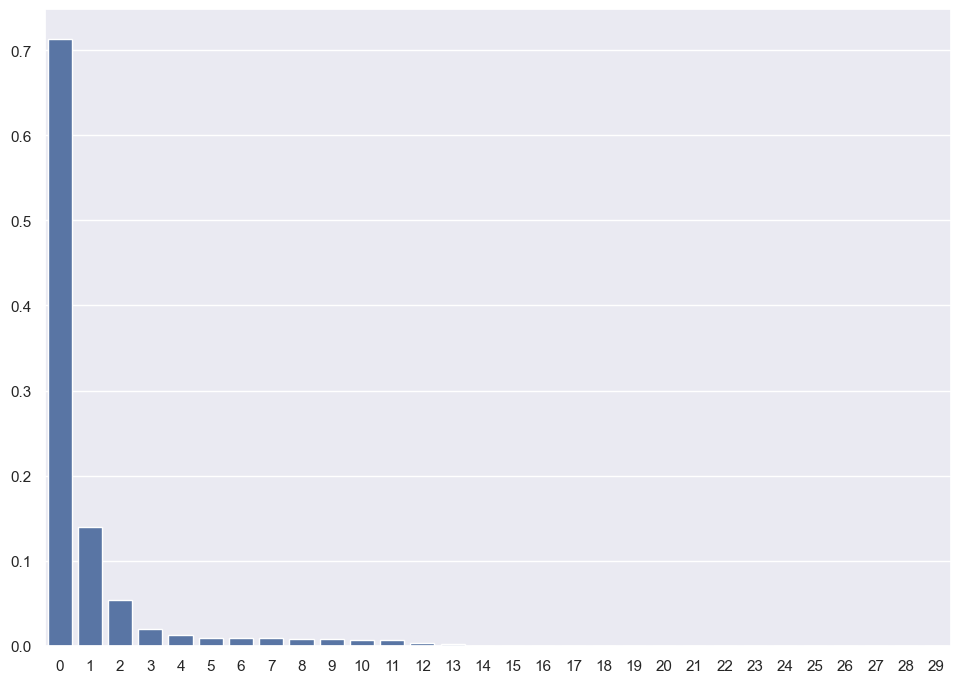

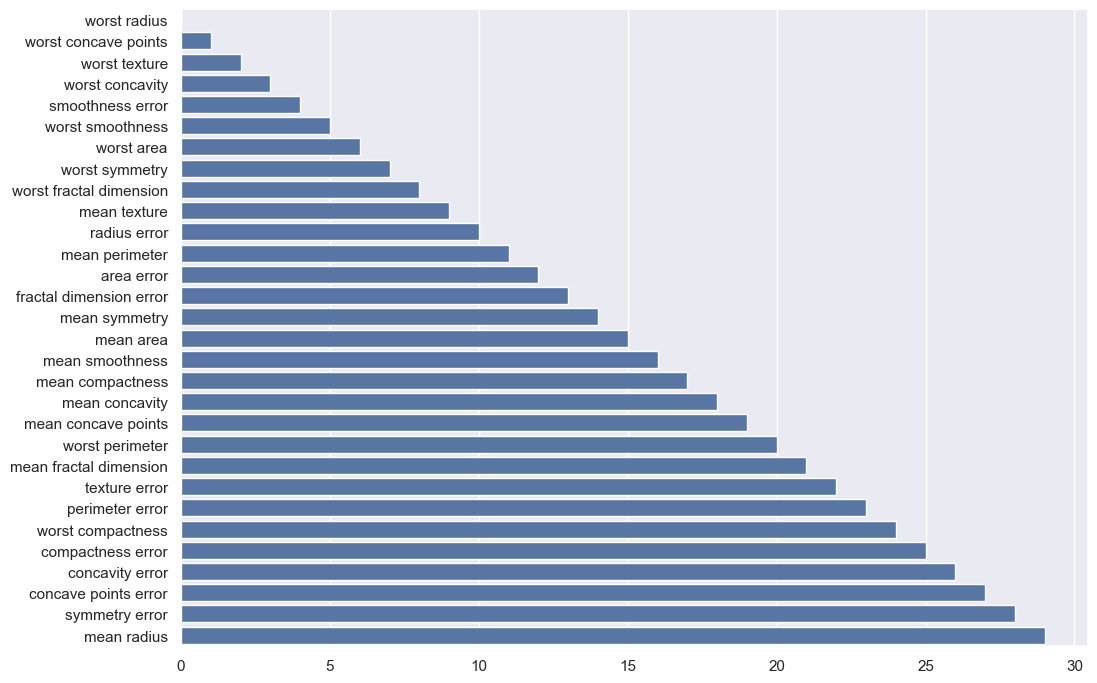

In [11]:
import seaborn as sns

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = dataset.feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances)
plt.show()
plt.clf()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_feature_names)
plt.show()


Based on this output, we could conclude that the features worst concave points, worst radius and mean texture are most predictive of a malignant tumor. There are also many features with importances close to zero which we may want to exclude from our model.

#### Pros and cons of using Gini importance
Because Gini impurity is used to train the decision tree itself, it is computationally inexpensive to calculate. However, Gini impurity is somewhat biased toward selecting numerical features (rather than categorical features). It also does not take into account the correlation between features. For example, if two highly correlated features are both equally important for predicting the outcome variable, one of those features may have low Gini-based importance because all of it’s explanatory power was ascribed to the other feature. This issue can be mediated by removing redundant features before fitting the decision tree.

### Other measures of feature importance
There are many other methods for estimating feature importance beyond calculating Gini gain for a single decision tree. We’ll explore a few of these methods below.

#### Aggregate methods
Random forests are an ensemble-based machine learning algorithm that utilize many decision trees (each with a subset of features) to predict the outcome variable. Just as we can calculate Gini importance for a single tree, we can calculate average Gini importance across an entire random forest to get a more robust estimate.

#### Permutation-based methods
Another way to test the importance of particular features is to essentially remove them from the model (one at a time) and see how much predictive accuracy suffers. One way to “remove” a feature is to randomly permute the values for that feature, then refit the model. This can be implemented with any machine learning model, including non-tree-based- methods. However, one potential drawback is that it is computationally expensive because it requires us to refit the model many times.

#### Coefficients
When we fit a general(ized) linear model (for example, a linear or logistic regression), we estimate coefficients for each predictor. If the original features were standardized, these coefficients can be used to estimate relative feature importance; larger absolute value coefficients are more important. This method is computationally inexpensive because coefficients are calculated when we fit the model. It is also useful for both classification and regression problems (i.e., categorical and continuous outcomes). However, similar to the other methods described above, these coefficients do not take highly correlated features into account.

### Conclusion
In this article, we’ve covered a few different examples of feature importance metrics, including how to interpret and calculate them. We learned about:

Gini impurity
How to calculate Gini-based feature importance for a decision tree in sklearn
Other methods for calculating feature importance, including:
Aggregate methods
Permutation-based methods
Coefficients
Feature importance is an important part of the machine learning workflow and is useful for feature engineering and model explanation, alike!